In [129]:
import pandas as pd

data_frame = pd.read_csv("pet_adoption_data.csv")
data_frame.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [130]:
def filter_pets(df, pet_type=None, breed=None, max_age_months=None, color=None, size=None, adopted = None,
                vaccinated=None,health=None,prev=None):
    """
    Filter the pets DataFrame based on specified criteria.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing pet data.
    pet_type (str): The type of pet to filter by.
    breed (str): The breed of the pet to filter by.
    max_age_months (int): The maximum age of the pet in months to filter by (pets younger than this age).
    color (str): The color of the pet to filter by. ('white', 'black', 'orange')
    size (str): The size of the pet to filter by. ('small', 'medium', 'large')
    
    Returns:
    pd.DataFrame: A DataFrame filtered by the specified criteria.
    pd.DataFrame: A complementary DataFrame with pets that do not match the criteria.
    """
    
    df_filtered = df
    df_complementary = df
    
    # Filter by pet type if specified
    if pet_type:
        df_filtered = df_filtered[df_filtered['PetType'] == pet_type]
        df_complementary = df_complementary[df_complementary['PetType'] == pet_type]
        
    # Apply filters to get the main subset
    if breed:
        df_filtered = df_filtered[df_filtered['Breed'] == breed]
    if max_age_months is not None:
        df_filtered = df_filtered[df_filtered['AgeMonths'] < max_age_months]
    if color:
        df_filtered = df_filtered[df_filtered['Color'] == color]

    if adopted:
        df_filtered = df_filtered[df_filtered['AdoptionLikelihood'] == adopted]
        df_complementary = df_complementary[df_complementary['AdoptionLikelihood'] == adopted]
    if size:
        df_filtered = df_filtered[df_filtered['Size'] == size]
    if vaccinated:
        df_filtered = df_filtered[df_filtered['Vaccinated'] == vaccinated]
    if health:
        df_filtered = df_filtered[df_filtered['HealthCondition'] == health]
    if prev:
        df_filtered = df_filtered[df_filtered['PreviousOwner'] == prev]
    
    # Create the complementary subset by excluding the filtered results
    df_complementary = df_complementary[~df_complementary.index.isin(df_filtered.index)]
    
    return df_filtered, df_complementary

In [131]:
from lifelines.statistics import logrank_test
from lifelines.statistics import KaplanMeierFitter


group1,group2 = filter_pets(data_frame,pet_type='Dog',color='White',size='Small')
# kmf = KaplanMeierFitter()

# kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
# kmf.plot(ci_show=True)

# kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
# kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])

results.p_value

0.8506974694446651

In [132]:
group1,group2 = filter_pets(data_frame,pet_type='Cat',color='Orange')
results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

0.8794699767625658

9.106897756256654e-28

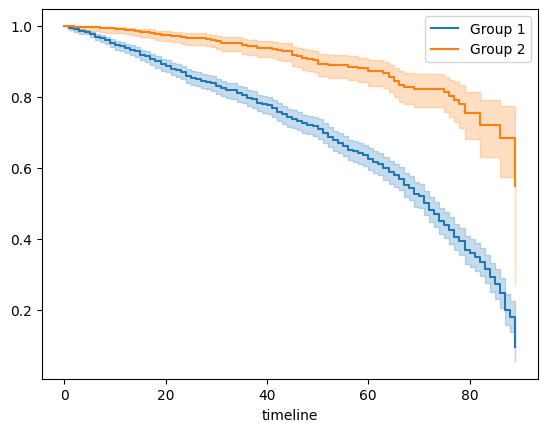

In [133]:
group1,group2 = filter_pets(data_frame,vaccinated=1)
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

1.1251042583268865e-18

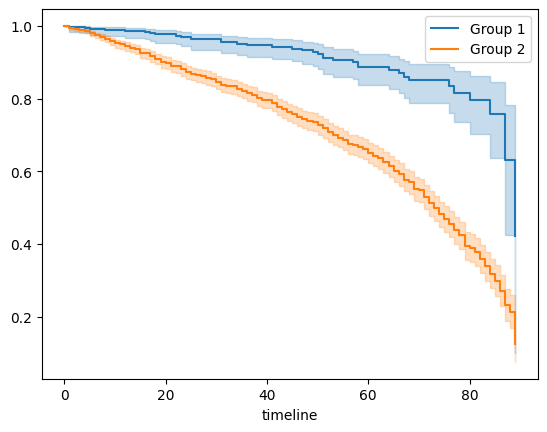

In [134]:
group1,group2 = filter_pets(data_frame,health=1)
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

In [135]:
group1,group2 = filter_pets(data_frame,prev=1)
results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

0.2755002266894539

4.3741402915249335e-05

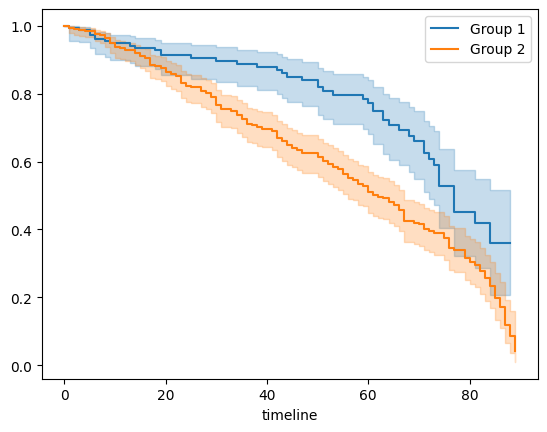

In [136]:
group1,group2 = filter_pets(data_frame,pet_type='Dog',breed='Golden Retriever')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

0.017762884735976894

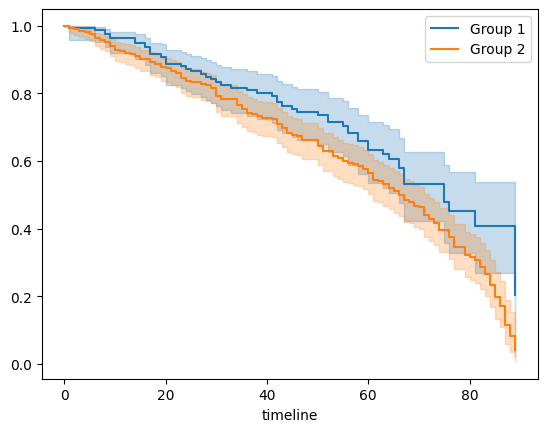

In [137]:
group1,group2 = filter_pets(data_frame,pet_type='Dog',breed='Poodle')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

7.19007329492101e-10

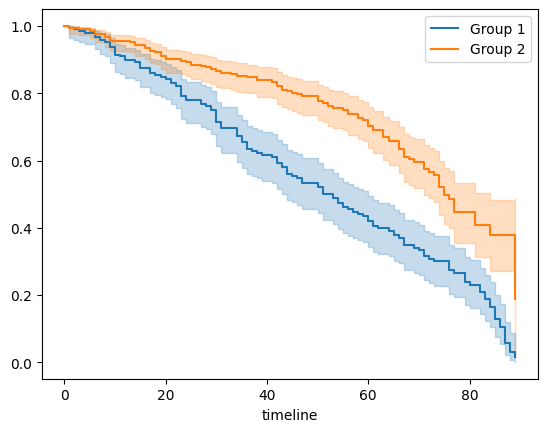

In [138]:
group1,group2 = filter_pets(data_frame,pet_type='Dog',breed='Labrador')
kmf = KaplanMeierFitter()

kmf.fit(group1['TimeInShelterDays'], group1['AdoptionLikelihood'], label='Group 1')
kmf.plot(ci_show=True)

kmf.fit(group2['TimeInShelterDays'], group2['AdoptionLikelihood'], label='Group 2')
kmf.plot(ci_show=True)

results = logrank_test(group1['TimeInShelterDays'], group2['TimeInShelterDays'], group1['AdoptionLikelihood'], group2['AdoptionLikelihood'])
results.p_value

now lets do log rank.

In [139]:
def create_dataset_with_groups(data):
    colors = ['Black', 'Brown', 'Gray', 'Orange', 'White']
    sizes = ['Small', 'Medium', 'Large']
    types = ['Dog','Cat','Bird','Rabbit']

    # Create a mapping of combinations to group numbers
    group_mapping = {}
    group_number = 1
    for type in types:
        for color in colors:
            for size in sizes:
                combination_name = f'{color} and {size} of {type}'
                group_mapping[combination_name] = group_number
                group_number += 1
    
    # Create the groups column
    data['groups'] = None
    
    for type in types:
        for color in colors:
            for size in sizes:
                combination_name = f'{color} and {size} of {type}'
                group_number = group_mapping[combination_name]
                data.loc[(data['Color'] == f'{color}') & (data['Size'] == f'{size}')& (data['PetType'] == f'{type}'), 'groups'] = group_number
    
    # Create the new dataframe with required columns
    new_df = pd.DataFrame({
        'durations': data['TimeInShelterDays'],
        'groups': data['groups'],
        'events': data['AdoptionLikelihood']
    })
    
    return new_df, group_mapping

In [140]:


# Create the combinations
df_multy, map= create_dataset_with_groups(data_frame)
df_multy.head()

,durations,groups,events
0,27,42,0
1,8,60,0
2,85,11,0
3,61,43,0
4,28,54,0


In [141]:
from lifelines.statistics import multivariate_logrank_test



result = multivariate_logrank_test(df_multy['durations'], df_multy['groups'], df_multy['events'])
result.test_statistic
result.p_value

1.8781003296251303e-49

now we saw that there is a change. lets rank eache grop with its mean and then performe log rank

In [142]:
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None

def rank_and_create_new_dataframe(new_df,map):
    
    # Calculate the mean durations for each group
    group_means = new_df.groupby('groups')['durations'].median().reset_index()
    group_means.columns = ['groups', 'mean_durations']
    
    # Rank groups by mean durations
    group_means['rank'] = group_means['mean_durations'].rank(method='dense', ascending=False).astype(int)
    
    # Create a new dataframe with columns based on ranked groups
    ranked_df = pd.DataFrame()
    
    for _, row in group_means.iterrows():
        group = row['groups']
        rank = row['rank']
        subset = new_df[new_df['groups'] == group][['durations', 'events']]
        
        ranked_df[f'durations_of_{get_key_by_value(map,int(rank))}'] = subset['durations'].reset_index(drop=True)
        ranked_df[f'events_of_{get_key_by_value(map,int(rank))}'] = subset['events'].reset_index(drop=True)
    
    return ranked_df,group_means




In [143]:
ranked_df, group_means= rank_and_create_new_dataframe(df_multy,map)
group_means.head()

,groups,mean_durations,rank
0,1,49.5,11
1,2,52.0,7
2,3,44.5,19
3,4,41.0,23
4,5,53.0,5


In [144]:
from lifelines.statistics import logrank_test

def calculate_p_values(df):
    p_values = []
    columns = df.columns
    
    # Identify pairs of duration and event columns
    duration_cols = [col for col in columns if 'durations_of' in col]
    event_cols = [col for col in columns if 'events_of' in col]
    
    
    
    # Compare each consecutive pair of duration and event columns
    for i in range(len(duration_cols) - 1):
        T1 = df[duration_cols[i]].tolist()
        E1 = df[event_cols[i]].tolist()
        T2 = df[duration_cols[i + 1]].tolist()
        E2 = df[event_cols[i + 1]].tolist()
        
        if T1 and T2 and E1 and E2:  # Ensure there is data to compare
            results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
            p_values.append(results.p_value)
    
    return p_values

p_vals = calculate_p_values(ranked_df)
print(p_vals)

[0.04918963790225342, 0.49397395615908657, 0.15768998897999303, 0.7386326948818995, 0.214190249396733, 0.07660499165272587, 0.29789250710701476, 0.00027657977710735925, 0.0002192506161349024, 0.3507423409474386, 0.0010994898947185687, 0.36730642623381404, 0.012400841723983905, 0.009249414950464767, 0.33731001507853353, 0.0002387716910732503, 8.610953780676646e-05, 0.000593501084788121, 0.0006716834374059584, 6.756001023190107e-05, 0.6983806860499762, 0.0005062021108399927, 0.0029396764619851723, 0.524390831294923, 0.032613712932570954, 0.24977804925344316, 0.0238095751150575, 0.02931995213485417, 1.4797580846124497e-06]


In [145]:
from statsmodels.stats.multitest import fdrcorrection
print(fdrcorrection(p_vals, alpha=0.05))

(array([False, False, False, False, False, False, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True]), array([8.39117352e-02, 5.50970951e-01, 2.40684720e-01, 7.38632695e-01,
       3.10575862e-01, 1.23419153e-01, 3.92676487e-01, 1.33680226e-03,
       1.33680226e-03, 4.23813662e-01, 3.18852069e-03, 4.26075454e-01,
       2.76634162e-02, 2.23527528e-02, 4.23813662e-01, 1.33680226e-03,
       8.32392199e-04, 2.15144143e-03, 2.16431330e-03, 8.32392199e-04,
       7.23322853e-01, 2.09712303e-03, 7.75005613e-03, 5.63234597e-01,
       5.91123547e-02, 3.44931592e-01, 4.93198342e-02, 5.66852408e-02,
       4.29129845e-05]))


now lets try to do U-test instead of log rank to get some knowledge about the directions

In [146]:
df_multy_adopted = df_multy[df_multy['events'] == 1]

ranked_df, group_means= rank_and_create_new_dataframe(df_multy_adopted,map)
ranked_df.head()



,durations_of_Black and Large of Cat,events_of_Black and Large of Cat,durations_of_Orange and Large of Cat,events_of_Orange and Large of Cat,durations_of_White and Medium of Dog,events_of_White and Medium of Dog,durations_of_White and Large of Bird,events_of_White and Large of Bird,durations_of_Orange and Small of Bird,events_of_Orange and Small of Bird,...,durations_of_Orange and Medium of Dog,events_of_Orange and Medium of Dog,durations_of_Black and Medium of Cat,events_of_Black and Medium of Cat,durations_of_Gray and Small of Dog,events_of_Gray and Small of Dog,durations_of_Gray and Large of Cat,events_of_Gray and Large of Cat,durations_of_Black and Large of Rabbit,events_of_Black and Large of Rabbit
0,51,1,79,1,23,1,52.0,1.0,30,1,...,7,1,53.0,1.0,60.0,1.0,56,1,1.0,1.0
1,27,1,51,1,81,1,16.0,1.0,85,1,...,64,1,NaN,NaN,71.0,1.0,2,1,33.0,1.0
2,80,1,9,1,59,1,23.0,1.0,71,1,...,51,1,NaN,NaN,79.0,1.0,65,1,34.0,1.0
3,44,1,55,1,50,1,NaN,NaN,87,1,...,74,1,NaN,NaN,76.0,1.0,35,1,5.0,1.0
4,20,1,76,1,87,1,NaN,NaN,67,1,...,52,1,NaN,NaN,45.0,1.0,75,1,NaN,NaN


In [147]:
#stats.mannwhitneyu(np.array(pets[0]['TimeInShelterDays']),np.array(pets[1]['TimeInShelterDays']),alternative=direction)

def calculate_p_values_U(df):
    p_values = []
    columns = df.columns
    
    # Identify pairs of duration and event columns
    duration_cols = [col for col in columns if 'durations_of' in col]
    event_cols = [col for col in columns if 'events_of' in col]
    
    # Sort columns to ensure they are paired correctly
    duration_cols.sort()
    event_cols.sort()
    
    # Compare each consecutive pair of duration and event columns
    for i in range(len(duration_cols) - 1):
        T1 = df[duration_cols[i]].dropna().tolist()
        E1 = df[event_cols[i]].dropna().tolist()
        T2 = df[duration_cols[i + 1]].dropna().tolist()
        E2 = df[event_cols[i + 1]].dropna().tolist()
        
        if T1 and T2 and E1 and E2:  # Ensure there is data to compare
            results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
            p_values.append(results.p_value)
    
    return p_values

p_vals = calculate_p_values(ranked_df)
print(p_vals)

[0.5717337580532695, 0.28604659308884683, 0.040486035292625205, 0.06394112506012851, 0.72267790089302, 0.6775028752110456, 0.4157669824844794, 0.47490108304753065, 0.47996634563172025, 0.919492163572441, 0.8648692788165095, 0.8166309997096104, 0.15473056662118922, 0.7902628260569166, 0.5155826368785728, 0.0068430950804014064, 0.289721772023489, 0.03441337254099347, 0.6304007951121542, 0.4280535063756432, 0.7262095723399786, 0.24091047030981266, 0.8438488905664223, 0.25908900598069395, 0.465333875992065, 0.9961467671249729, 0.7219397716696392, 0.35611759639608287, 0.5457592597868625, 0.7132175023416227, 0.2768581868407639, 0.02460234995364179, 0.021604681565160384, 0.915726247597593, 0.419614165564107, 0.5185507359329973, 0.4597464714957845, 0.6375982884604721, 0.8917248175105904, 0.445574893590188, 0.13548304720894558, 0.6433166319016743, 0.8063799222728566, 0.261647125129057, 0.9961467671249729, 0.4498778557021409, 0.7895330713870277, 0.018809799187078403]


In [148]:
print(data_frame[(data_frame['PetType'] == 'Cat') & (data_frame['Color'] == 'Black') & (data_frame['Size'] == 'Medium')])

      PetID PetType    Breed  AgeMonths  Color    Size   WeightKg  Vaccinated  \
58      558     Cat  Persian        118  Black  Medium   8.559580           0   
119     619     Cat  Persian         54  Black  Medium  20.498494           1   
139     639     Cat  Persian         68  Black  Medium  24.806657           0   
190     690     Cat  Persian         52  Black  Medium   6.028486           1   
314     814     Cat  Siamese        140  Black  Medium  23.477372           1   
369     869     Cat  Siamese         29  Black  Medium  29.388667           1   
370     870     Cat  Siamese         27  Black  Medium  12.204676           1   
449     949     Cat  Siamese         17  Black  Medium   7.040053           0   
596    1096     Cat  Persian         69  Black  Medium   1.046434           0   
664    1164     Cat  Siamese        143  Black  Medium   9.289402           1   
699    1199     Cat  Persian         85  Black  Medium  11.411022           1   
745    1245     Cat  Siamese